In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

In [35]:
# Load the audio file
audio_file = 'NG A2.wav'
audio, sample_rate = librosa.load(audio_file, sr=None)

[ 4.5297725e-06  2.8334188e-07  9.3406311e-07 ... -6.9505049e-06
 -7.0068922e-06 -7.0563974e-06]


In [28]:
standard_note = {"E2": 82.41, 
                 "A2":110.00, 
                 "D3": 146.83, 
                 "G3": 196.00, 
                 "B3": 246.94, 
                 "E4": 329.63}

diff = 0 

In [36]:
# Apply Fourier Transform
fft = np.fft.fft(audio)
magnitude = np.abs(fft)
frequency = np.fft.fftfreq(len(magnitude), 1 / sample_rate)

# Find the dominant frequency
dominant_frequency = frequency[np.argmax(magnitude)]
print("Dominant Frequency: ", dominant_frequency)

[-0.00110876-2.76167977e-15j -0.31445095+1.83378708e-01j
 -0.31715693+7.60037188e-02j ... -0.48809748-1.53285473e-01j
 -0.31715693-7.60037188e-02j -0.31445095-1.83378708e-01j]
Dominant Frequency:  109.90590208226578


In [30]:
# Calculate Duration of Sound
def get_duration(audio, sample_rate):
    return len(audio) / sample_rate

time = get_duration(audio, sample_rate)
time_spacing = np.linspace(0, time, len(audio))

# Rescale Frequency Domain
rescaled_freq = np.linspace(-np.pi, np.pi, len(magnitude))

In [31]:
# Pitch Shifting
def shift_pitch(note, frequency):
    if standard_note[note] > frequency[np.argmax(magnitude)]:
        frequency = frequency + (standard_note[note] - frequency[np.argmax(magnitude)])
        
    return frequency

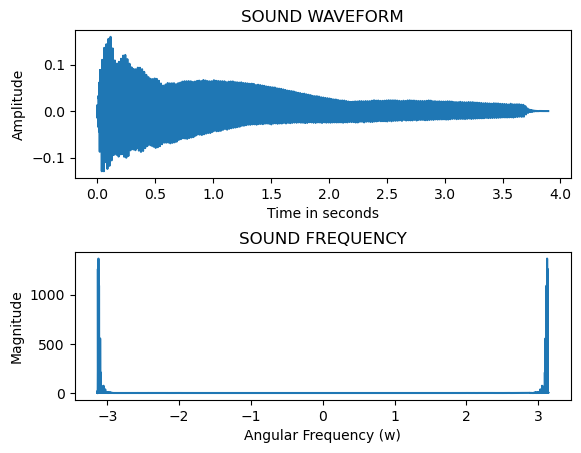

In [32]:
# Plot sound waveform
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)

ax1.set_xlabel('Time in seconds')
ax1.set_ylabel('Amplitude') # could be in meter
ax1.set_title('SOUND WAVEFORM')
ax1.plot(time_spacing, audio)

ax2.set_xlabel('Angular Frequency (w)')
ax2.set_ylabel('Magnitude') # could be in meter
ax2.set_title('SOUND FREQUENCY')
ax2.plot(rescaled_freq, magnitude)

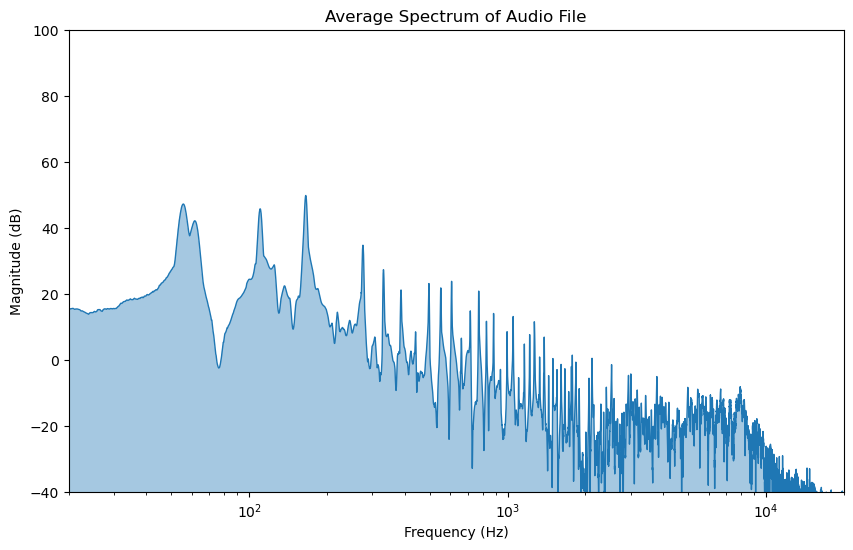

In [33]:
# Frequency Analysis
from scipy.signal import savgol_filter

magnitude_db = 20 * np.log10(magnitude)
log_magnitude = librosa.amplitude_to_db(magnitude)

magnitude_db = savgol_filter(magnitude_db, 31, 3)

plt.figure(figsize=(10, 6))
plt.plot(frequency, magnitude_db, '-', lw=1)
plt.title('Average Spectrum of Audio File')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(20, 20000)  # Set the x-axis limits from 20 Hz to 20 kHz
plt.ylim(-40, 100)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.fill_between(frequency, magnitude_db, step="pre", alpha=0.4)
plt.show()

In [20]:
shifted_frequency = shift_pitch('A2', frequency)
shifted_fft = np.fft.ifft(shifted_frequency)




In [21]:
shifted_dominant_frequency = shifted_frequency[np.argmax(magnitude)]
print("Dominant Frequency: ", shifted_dominant_frequency)


Dominant Frequency:  110.0


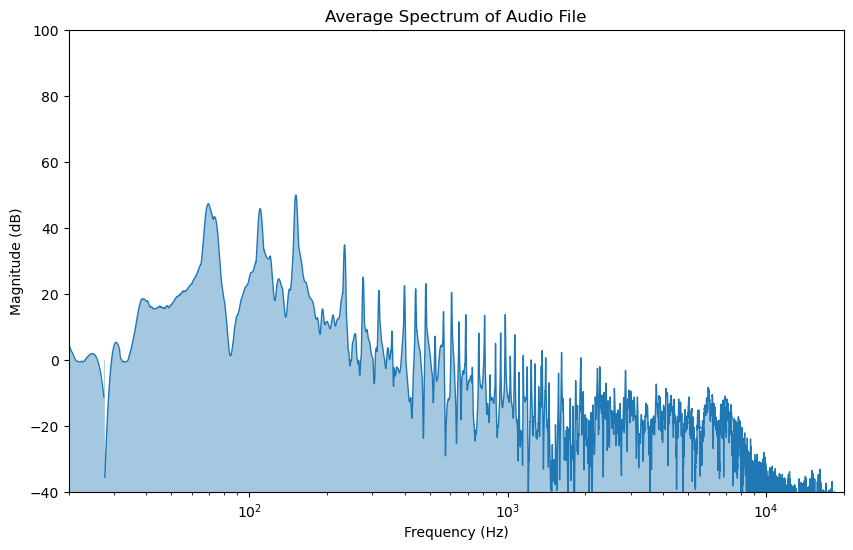

In [22]:
# Frequency Analysis
from scipy.signal import savgol_filter

magnitude_db = 20 * np.log10(magnitude)
log_magnitude = librosa.amplitude_to_db(magnitude)

magnitude_db = savgol_filter(magnitude_db, 31, 3)

plt.figure(figsize=(10, 6))
plt.plot(shifted_frequency, magnitude_db, '-', lw=1)
plt.title('Average Spectrum of Audio File')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(20, 20000)  # Set the x-axis limits from 20 Hz to 20 kHz
plt.ylim(-40, 100)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.fill_between(shifted_frequency, magnitude_db, step="pre", alpha=0.4)
plt.show()

In [41]:
import sounddevice as sd
sd.play(audio, sample_rate)
time.sleep(5.0)
sd.stop()

AttributeError: 'float' object has no attribute 'sleep'